# Titanic Report

### In this notebook, The goal is to correctly predict if someone survived the Titanic shipwreck.

## Data Dictionary

 **Variable** | **Definitoin**                              | **Key**                                
---------------|---------------------------------------------|----------------------------------------
 survival      | Survival                                    | 0 = No, 1 = Yes                        
 pclass        | Ticket Class                                | 1 = 1st, 2 = 2nd, 3 = 3rd              
 sex           | Sex                                         |                                        
 Age           | Age(years)                                  |                                        
 sibsp         | # of siblings / spouses aboard the Titanic	 |                                        
 parch         | # of parents / children aboard the Titanic  |                                        
 ticket        | Ticket Number                               |                                        
 fare          | Passenger Fare                              |                                        
 cabin         | Cabin Number                                |                                        
 embarked      | Port of Embarkation                         | C=Cherbourg,Q=Queenstown,S=Southampton 



## Variable Notes
1. pclass: A proxy for socio-economic status (SES)

1st = Upper
2nd = Middle
3rd = Lower

2. age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

3. sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

4. parch: The dataset defines family relations in this way...

Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Overview

###### 1) Understand the shape of the data (Histograms, box plots, etc.)
###### 2) Data Cleaning
###### 3) Data Exploration
###### 4) Feature Engineering
###### 5) Data Preprocessing for Model
###### 6) Basic Model Building
###### 7) Model Tuning
###### 8) Ensemble Modle Building
###### 9) Results

### Importing important libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Reading datasets for the analysis.
# We'll be training the model on train data and prediction will be made on test data
training = pd.read_csv('/Practice code/DataSets/titanictrain.csv')
test = pd.read_csv('/Practice code/DataSets/titanictest.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
#all_data.columns

## Understand nature of the data

### Data Exploration


In [4]:
# look at our data types & null counts 
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [5]:
# to better understand the numeric data
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [6]:
# taking numeric and categorical values separately 
titanic_num = training[['Age','SibSp','Parch','Fare']]
titanic_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


###### 1. For numeric data

    -Made histograms to understand distributions

    -Corrplot

    -Pivot table comparing survival rate across numeric variables



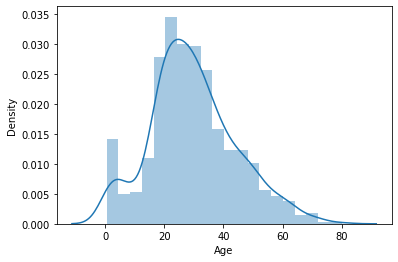

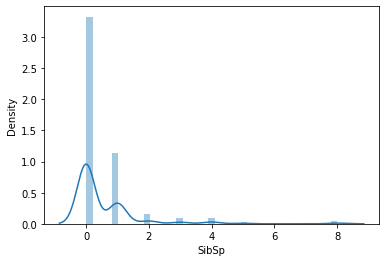

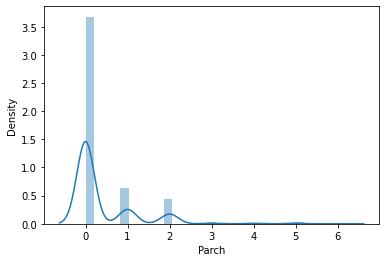

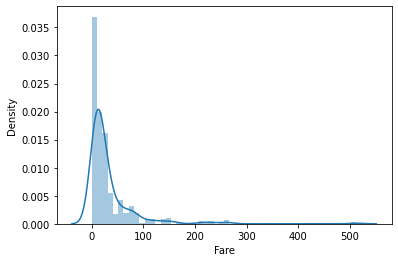

In [7]:
# sb.distplot(df['petal_length'],kde = False)
# plt.show()

for i in titanic_num.columns:
    sns.distplot(titanic_num[i],kde = True)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

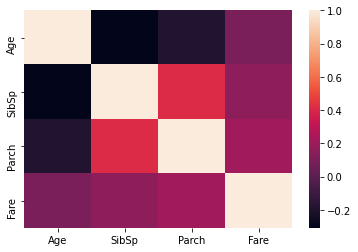

In [9]:
print(titanic_num.corr())
sns.heatmap(titanic_num.corr())

In [10]:
# pivot table to compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


###### 2. For Categorical Data

    -Made bar charts to understand balance of classes

    -Made pivot tables to understand relationship with survival

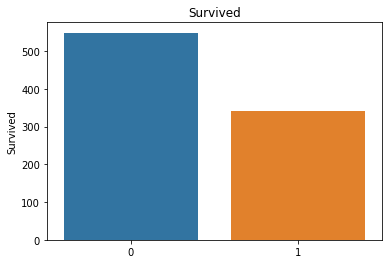

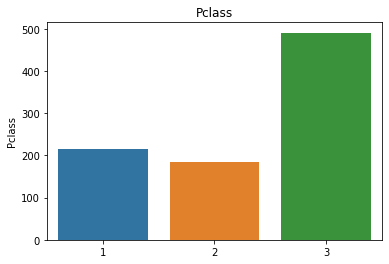

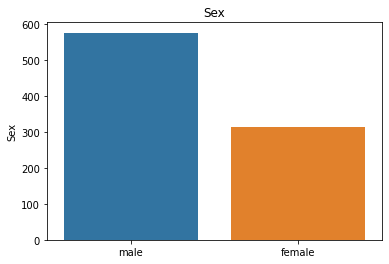

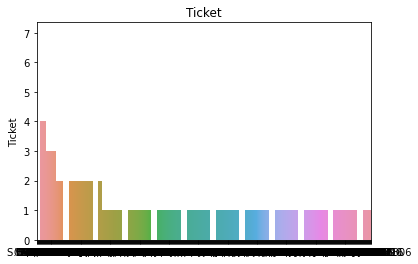

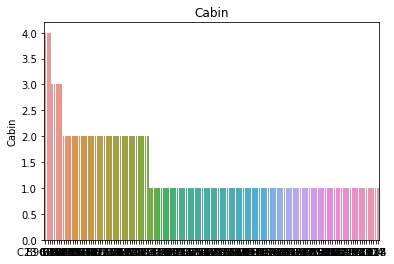

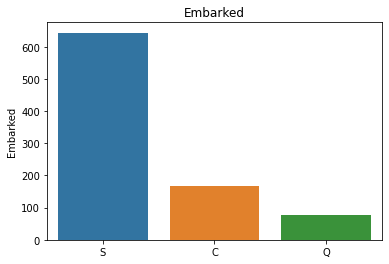

In [14]:
for i in titanic_cat.columns:
    sns.barplot(titanic_cat[i].value_counts().index,titanic_cat[i].value_counts()).set_title(i)
    plt.show()